In [190]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [191]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [192]:
from our_mpeg import (
    compress_image,
    compress_image_with_reference,
    compress_image_with_dual_reference,
    decompress_image_with_dual_reference,
    decompress_image,
    load
)

In [194]:
example = load("/home/sidor/Dropbox/light_filed_video/bottle.zip")

In [195]:
import os
import gzip

def append_compressed(filename, im1_offsets, im1_residuals_q):
    with gzip.open(filename, 'ab+') as f:
        np.save(f, np.array(im1_offsets, dtype=np.int8))
        np.save(f, np.array(im1_residuals_q))
        
#     with gzip.open(filename, 'rb') as f:
#         a = np.load(f)
#         b = np.load(f)
#         print("ERROR", np.linalg.norm(a - np.array(im1_offsets)), a.dtype)
#         print("ERROR", np.linalg.norm(b - np.array(im1_residuals_q)), b.dtype)
#         print(f.name)

# Compression with no reference

In [196]:
FILENAME = '/tmp/video.mp4.gz'

if os.path.exists(FILENAME):
    _ = os.remove(FILENAME)

for t in range(example.shape[0]):
    cur_img = example[t,0,0,:,:, :]

    a = compress_image(cur_img)
    with gzip.open(FILENAME, 'ab+') as f:
        np.save(f, np.array(a))

    print("Timestep", t, "Size after zipping", os.path.getsize(FILENAME), flush=True)

Timestep 0 Size after zipping 33878
Timestep 1 Size after zipping 67825
Timestep 2 Size after zipping 101883
Timestep 3 Size after zipping 135976
Timestep 4 Size after zipping 170127
Timestep 5 Size after zipping 204536
Timestep 6 Size after zipping 239324
Timestep 7 Size after zipping 274144
Timestep 8 Size after zipping 309149
Timestep 9 Size after zipping 344512
Timestep 10 Size after zipping 380043
Timestep 11 Size after zipping 415690
Timestep 12 Size after zipping 451584
Timestep 13 Size after zipping 487467
Timestep 14 Size after zipping 523448
Timestep 15 Size after zipping 559562
Timestep 16 Size after zipping 595714
Timestep 17 Size after zipping 631762
Timestep 18 Size after zipping 667998
Timestep 19 Size after zipping 704254
Timestep 20 Size after zipping 740599
Timestep 21 Size after zipping 777132
Timestep 22 Size after zipping 813590
Timestep 23 Size after zipping 850478
Timestep 24 Size after zipping 887485
Timestep 25 Size after zipping 924736
Timestep 26 Size after z

# Compression with prev as reference

In [197]:
FILENAME = '/tmp/video.mp4.gz'

if os.path.exists(FILENAME):
    _ = os.remove(FILENAME)

for t in range(example.shape[0] - 1):
    next_img = example[t+1,0,0,:,:, :]
    prev_img = example[t,0,0,:,:,:]

    a, b = compress_image_with_reference(next_img, prev_img)
    append_compressed(FILENAME, a, b)

    print("Timestep", t, "Size after zipping", os.path.getsize(FILENAME), flush=True)

Timestep 0 Size after zipping 4863
Timestep 1 Size after zipping 11728
Timestep 2 Size after zipping 19488
Timestep 3 Size after zipping 27407
Timestep 4 Size after zipping 35658
Timestep 5 Size after zipping 43831
Timestep 6 Size after zipping 51997
Timestep 7 Size after zipping 60446
Timestep 8 Size after zipping 69547
Timestep 9 Size after zipping 78804
Timestep 10 Size after zipping 88674
Timestep 11 Size after zipping 98941
Timestep 12 Size after zipping 109677
Timestep 13 Size after zipping 120790
Timestep 14 Size after zipping 132853
Timestep 15 Size after zipping 145376
Timestep 16 Size after zipping 158800
Timestep 17 Size after zipping 172324
Timestep 18 Size after zipping 186454
Timestep 19 Size after zipping 200962
Timestep 20 Size after zipping 215428
Timestep 21 Size after zipping 230133
Timestep 22 Size after zipping 245169
Timestep 23 Size after zipping 260439
Timestep 24 Size after zipping 276069
Timestep 25 Size after zipping 291956
Timestep 26 Size after zipping 3080

In [199]:
FILENAME = '/tmp/video.mp4.gz'

if os.path.exists(FILENAME):
    _ = os.remove(FILENAME)

for t in range(example.shape[0] - 1):
    next_img = example[t+1,0,0,:,:, :]
    prev_img = example[t,0,0,:,:,:]
    prev_img_2 = example[t+1,1,0,:,:]

    a, b = compress_image_with_dual_reference(next_img, prev_img, prev_img_2)
    append_compressed(FILENAME, a, b)

    print("Timestep", t, "Size after zipping", os.path.getsize(FILENAME), flush=True)

KeyboardInterrupt: 

In [22]:
a

[[((0, 0), (0, 0)),
  ((0, -2), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (2, -2)),
  ((0, -2), (2, -2)),
  ((0, -2), (2, -2)),
  ((0, -2), (2, -2)),
  ((0, -2), (0, -2)),
  ((1, 2), (0, -2)),
  ((0, -1), (0, -2)),
  ((0, 0), (0, -2)),
  ((0, -1), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (1, -2)),
  ((0, -2), (2, -2)),
  ((0, -2), (2, -2)),
  ((0, -2), (2, -2)),
  ((0, -2), (0, -2)),
  ((0, 0), (0, -2)),
  ((0, 0), (0, -2)),
  ((0, -1), (0, -2)),
  ((0, 0), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (2, -2)),
  ((0, -2), (2, -2)),
  ((0, -2), (2, -2)),
  ((0, -2), (2, -2)),
  ((0, -2), (0, -2)),
  ((0, 0), (0, -2)),
  ((1, 2), (0, -2)),
  ((0, 0), (0, -2)),
  ((0, 0), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (1, -2)),
  ((0, -2), (2, -2)),
  ((0, -2), (2, -2)),

In [203]:
from PIL import Image

In [207]:
next_img = example[1,0,0,:,:, :]
prev_img = example[0,0,0,:,:,:]
prev_img_2 = example[1,1,0,:,:]
a, b = compress_image_with_dual_reference(next_img, prev_img, prev_img_2)
im = decompress_image_with_dual_reference(a, b, prev_img, prev_img_2)

7883.87


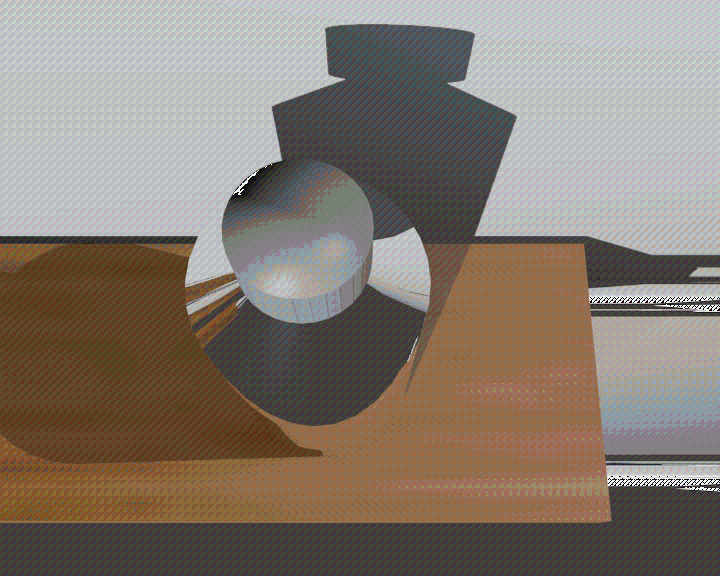

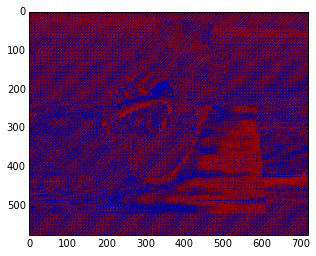

In [210]:
plt.imshow(im[:,:,0] - next_img[:,:,0])
print (np.linalg.norm(im[:,:,0].astype(np.float32) - next_img[:,:,0].astype(np.float32)))
Image.fromarray(im, "YCbCr").convert("RGB")

In [209]:
xxxx = compress_image(next_img)
im = decompress_image(xxxx)